In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from clustering.kmesar import KMESAR

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5)
df = pd.DataFrame(X, columns=['x', 'y'])

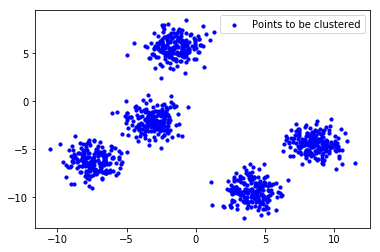

In [3]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=10, label='Points to be clustered')
plt.legend()

plt.show()

In [4]:
est = KMESAR(k_clusters=5,
             n_init=1,
             annealing_prob_function='log',
             alpha=1,
             annealing_weight_function='sigmoid',
             convergence_tracking=True,
             annealing_tracking=True
             )
est.fit(X)
df['label'] = est.labels_

Text(0.5, 1.0, 'KMESAR: k_clusters=5, n_iter=20, total_annealings=38, SSE= 1.99e+03')

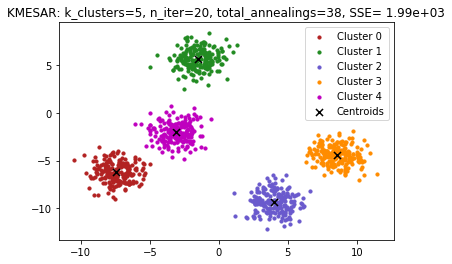

In [5]:
colors = ['firebrick', 'forestgreen', 'slateblue', 'darkorange', 'm']
for label in range(est.k_clusters):
    cluster = X[np.where(est.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label], s=10, label=f'Cluster {label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=50, marker='x', label='Centroids')
plt.legend()
plt.title(est.clustering_info())

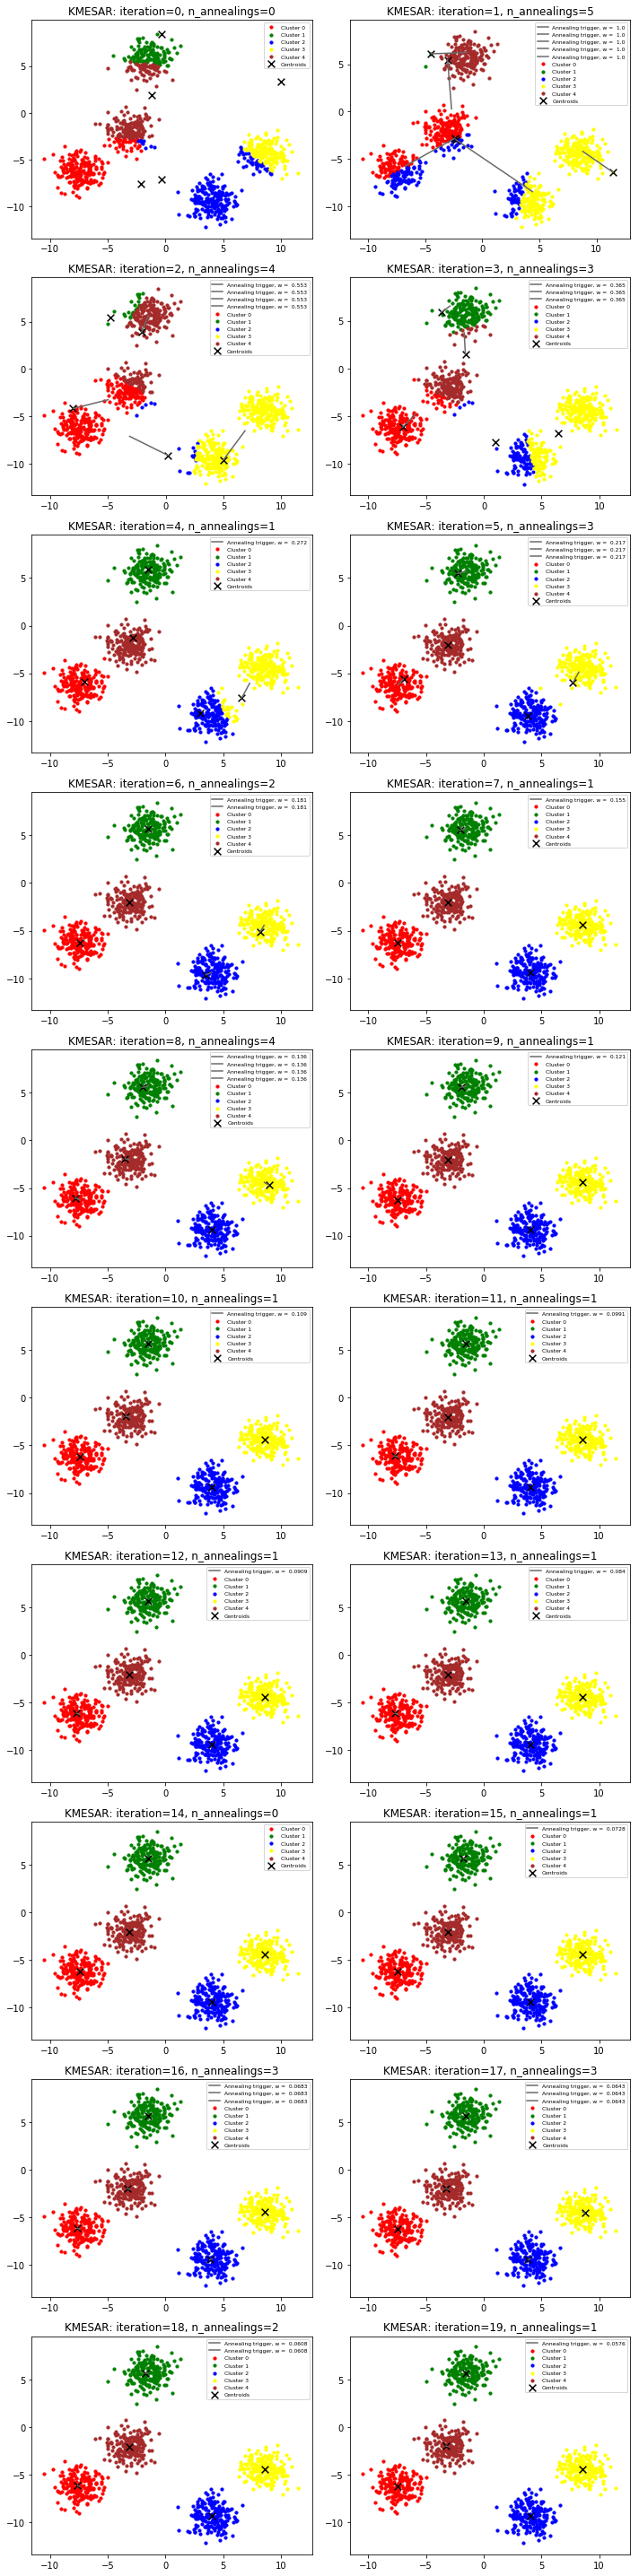

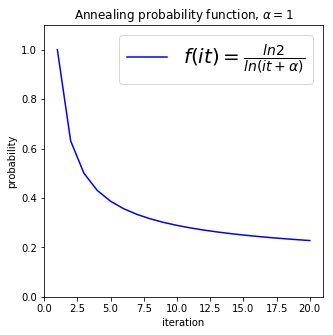

In [6]:
est.plot_tracking_history(X, out_file='KMESAR, 5_blobs, a_prob=log, a_weight=sigmoid')
est.plot_annealing_prob_function()